# 快速入门 Blackhole 数据分析功能
-------


Blackhole数据分析提供了非常类似Pandas的API，目前已经对齐了90%以上的方法和属性。但又区别于Pandas，Blackhole内部采用CPU多核加速、异构加速、高效存储、惰性计算等等技术，充分发挥硬件原生性能潜力。  
经过我们系统评估，在机器环境（CPU:28逻辑核,内存256G,Intel(R) Xeon(R）Gold 5117 CPU @2.00GHz）里，Blackhole数据处理量超过Pandas 8倍，性能加速超过7倍。

## Blackhole 数据分析中的数据结构

blackhole 数据分析提供两种数据类型，*Series* 和 *DataFrame*。

**Series** 是一种一维的数据类型，其中的每个元素都有各自的标签。如果你了解 Numpy，你可以把它当作一个由带标签的元素组成的 numpy 数组。标签可以是数字或者字符。

**DataFrame** 是一个二维的、表格型的数据结构。blackhole 的 DataFrame 可以储存许多不同类型的数据，并且每个轴都有标签。你可以把它当作一个 series 的字典。


## Blackhole环境准备
**CodeLab平台默认不安装Blackhole，请先到导航左边“包管理”页面安装blackhole。**  
**这个文档简单介绍了Blackhole数据分析的常用接口，更多关于blackhole使用方法和案例，请参考[Blackhole简介和基本用法](https://cloud.baidu.com/doc/BML/s/9khemrnv7)。**

## 数据集介绍
样例中采用的小数据集是英国在若干年下雨量相关的统计信息，数据主要有33行 * 7 列，让大家快速体验Blackhole，想要体验Blackhole的大数据处理过程，可以参考左边“Blackhole预测航班延迟案例”、 “Blackhole预测NYCtaxi票价案例”等。 

|  列名   | 说明  |
|  ----  | ----  |
|  Water Year | 年份 |
| Rain (mm) Oct-Sep  | 九月到十月降平均雨量（毫米） |
| Outflow (m3/s) Oct-Sep  | 九月到十月总降雨量（立方米） |
| Rain (mm) Dec-Feb  | 十二月到一月降平均雨量（毫米） |
| Outflow (m3/s) Dec-Feb  | 十二月到一月总降雨量（立方米） |
| Rain (mm) Jun-Aug  | 七月到八月降平均雨量（毫米） |
| Outflow (m3/s) Jun-Aug  | 七月到八月总降雨量（立方米） |

### 下载数据集

In [1]:
!wget --quiet https://blackhole-demo.bj.bcebos.com/uk_rain_2014.csv
!wget --quiet https://blackhole-demo.bj.bcebos.com/uk_rain.csv

# 1. 如何导入blackhole数据分析库？

In [2]:
import blackhole.dataframe as pd

说明：大家经常看到Pandas的导入方法是“import pandas as pd”，而Blackhole接口对齐了Pandas 90%以上的方法和属性，  
所以 **对于很多Pandas程序只要将“import pandas as pd” 替换成 “import blackhole.dataframe as pd”** ,  
一句代码修改就可以体验Blackhole的超大数据处理能力和加速效果。  
当然你也可以命名为任何你喜欢的名字，比如“import blackhole.dataframe as bhdf”。

# 2. 如何导入数据？

在对数据进行修改、探索和分析之前，我们得先导入数据，主要通过 **read_csv** 方法，read_csv会返回一个blackhole的DataFrame对象。

In [3]:
df = pd.read_csv('uk_rain_2014.csv', header=0)

In [4]:
type(df)

blackhole.dataframe.frame.DataFrame

**说明：相比Pandas的read_csv，读取大数据量文件的时候，Blackhole能够加速10倍以上，内存可以节省5倍以上。**

# 3. 如何进行数据探索和分析？

## 3.1 查看前 x 行的数据

In [5]:
# Getting first x rows.
df.head(5)

,Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


## 3.2 查看后 x 行的数据

In [6]:
# Getting last x rows.
df.tail(5)

,Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
28,2008/09,1139,4941,268,6690,323,3189
29,2009/10,1103,4738,255,6435,244,1958
30,2010/11,1053,4521,265,6593,267,2885
31,2011/12,1285,5500,339,7630,379,5261
32,2012/13,1090,5329,350,9615,187,1797


## 3.3 修改列名
你通常使用列的名字来在 blackhole 中查找列，但是有时列名太长，比如上面的“Rain (mm) Oct-Sep”，使用还挺麻烦，你可以把列名缩短之后一切就方便多了。

In [7]:
# Changing column labels.
df.columns = ['water_year','rain_octsep', 'outflow_octsep',
              'rain_decfeb', 'outflow_decfeb', 'rain_junaug', 'outflow_junaug']

df.head(5)

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


## 3.4 数据查看
你通常会想快速浏览数据集，比如查看数据有多少行、多少列，以及每列类型等，可以通过 **info**方法。  
看下面执行结果，就知道这个数据集有33行*7列。

In [34]:
df.info()

<class 'blackhole.dataframe.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   water_year      33 non-null     object
 1   rain_octsep     33 non-null     int32 
 2   outflow_octsep  33 non-null     int32 
 3   rain_decfeb     33 non-null     int32 
 4   outflow_decfeb  33 non-null     int32 
 5   rain_junaug     33 non-null     int32 
 6   outflow_junaug  33 non-null     int32 
 7   year            33 non-null     int32 
dtypes: int32(7), object(1)

/root/miniconda3/envs/blackhole_python3.7.9/lib/python3.7/site-packages/blackhole/dataframe/generic.py:659: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn('We recommend using `{}.to_numpy()` instead.'.format(type(self).__name__))


## 3.5 数据统计
你可能还想知道数据集的一些基本的统计信息，可以通过 **describe** 方法。describe将返回一张表，其中有诸如总数、均值、标准差之类的统计数据：

In [35]:
df.describe()

/root/miniconda3/envs/blackhole_python3.7.9/lib/python3.7/site-packages/blackhole/dataframe/indexes.py:486: UserWarning: We recommend using `Index.to_numpy()` instead.
  warnings.warn('We recommend using `{}.to_numpy()` instead.'.format(type(self).__name__))


,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000
mean,1129.000000,5019.181818,325.363636,7926.545455,237.484848,2439.757576,1996.00000
std,101.900074,658.587762,69.995008,1692.800049,66.167931,1025.914106,9.66954
min,856.000000,3479.000000,206.000000,4578.000000,103.000000,1078.000000,1980.00000
25%,1053.000000,4506.000000,268.000000,6690.000000,193.000000,1797.000000,1988.00000
50%,1139.000000,5112.000000,309.000000,7630.000000,229.000000,2142.000000,1996.00000
75%,1182.000000,5497.000000,360.000000,8905.000000,280.000000,2959.000000,2004.00000
max,1387.000000,6391.000000,484.000000,11486.000000,379.000000,5261.000000,2012.00000


## 3.6 过滤

（1）有时你想提取一整列，使用列的标签可以非常简单地做到，当我们提取列的时候，**会得到一个 series** ，而不是 dataframe 。记得我们前面提到过，你可以把 **dataframe 看作是一个 series 的字典**，所以在抽取列的时候，我们就会得到一个 series。

In [12]:
df['rain_octsep'][:5]

0    1182
1    1098
2    1156
3     993
4    1182
Name: rain_octsep, dtype: int32

（2）我们也可以像访问对象属性一样访问数据集的列：**只用一个点号**。

In [13]:
# Getting a column by label using .
df.rain_octsep[:5]

0    1182
1    1098
2    1156
3     993
4    1182
Name: rain_octsep, dtype: int32

（3）还可以通过 **布尔过滤（boolean masking）**的技术，得到一个*布林数组*，借助布林数组来过滤。  
    下面代码将会返回一个由布尔值构成的 Series。True 表示在十月-九月降雨量小于 1000 mm，False 表示大于等于 1000 mm

In [14]:
# Creating a series of booleans based on a conditional
df.rain_octsep[:5] < 1000 # Or df['rain_octsep] < 1000

0    False
1    False
2    False
3     True
4    False
Name: rain_octsep, dtype: bool

In [15]:
# Using a series of booleans to filter
df[df.rain_octsep < 1000]

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
3,1983/84,993,4265,391,8905,141,1078
8,1988/89,976,4330,309,6465,200,1440
15,1995/96,856,3479,245,5515,172,1439


(4) 还可以通过复杂表达式来进行过滤，下面这行代码只会返回“rain_octsep小于1000和outflow_octsep小于4000”的记录。  
***注意：这里不能用 and 关键字，因为会引发操作顺序的问题，必须用 & 和圆括号。***

In [36]:
# Filtering by multiple conditionals
# Can't use the keyword 'and'
df[(df.rain_octsep < 1000) & (df.outflow_octsep < 4000)] 

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
15,1995/96,856,3479,245,5515,172,1439,1995


(5) 如果你的数据中如果有字符串类型，你也可以使用字符串方法来进行过滤。比如下面的代码返回所有 90 年代的记录。  
***注意，你必须用 .str.[string method] ，而不能直接在字符串上调用字符方法***

In [37]:
# Filtering by string methods
df[df.water_year.str.startswith('199')]

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
10,1990/91,1022,4418,305,7120,216,1923,1990
11,1991/92,1151,4506,246,5493,280,2118,1991
12,1992/93,1130,5246,308,8751,219,2551,1992
13,1993/94,1162,5583,422,10109,193,1638,1993
14,1994/95,1110,5370,484,11486,103,1231,1994
15,1995/96,856,3479,245,5515,172,1439,1995
16,1996/97,1047,4019,258,5770,256,2102,1996
17,1997/98,1169,4953,341,7747,285,3206,1997
18,1998/99,1268,5824,360,8771,225,2240,1998
19,1999/00,1204,5665,417,10021,197,2166,1999


## 3.7 索引

之前的部分展示了如何通过列操作来得到数据，现在介绍下如何通过行标签来获取数据。**Blackhole行标签可以是基于数字的或者是其他类型的标签，根据标签的类型获取数据的方法也有所不同**

(1) 如果你的行标签是**数字型**的，你可以通过 ***iloc***来引用，它会返回指定行号的数据，并组装成 ***series***对象返回。

In [40]:
# Getting a row via a numerical index
df.iloc[30]

water_year        2010/11
rain_octsep          1053
outflow_octsep       4521
rain_decfeb           265
outflow_decfeb       6593
rain_junaug           267
outflow_junaug       2885
year                 2010
Name: 0, dtype: object

(2) 如果不是数字型的，比如也许你的数据集中有年份或者年龄的列，你可能想通过这些年份或者年龄来引用行，这个时候我们就可以设置一个（或者多个）新的索引：

In [19]:
#Setting a new index from an existing column
df = df.set_index(['water_year'])
df.head(5)

,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
water_year,,,,,,
1980/81,1182,5408,292,7248,174,2212
1981/82,1098,5112,257,7316,242,1936
1982/83,1156,5701,330,8567,124,1802
1983/84,993,4265,391,8905,141,1078
1984/85,1182,5364,217,5813,343,4313


上面的代码将 water_year 列设置为索引。***注意，列的名字实际上是一个列表***，虽然上面的例子中只有一个元素。如果你想设置多个索引，只需要在列表中加入列的名字即可。

上例中我们设置的索引列中都是字符型数据，这意味着我们不能继续使用 iloc 来引用，那我们用什么呢？用 loc 。

In [20]:
# Getting a row via a label-based index
df.loc['2000/01']

1239

和 ***iloc*** 一样，***loc*** 会返回你引用的列，唯一一点不同就是此时你使用的是基于字符串的引用，而不是基于数字的。

## 3.8 排序

排序通常会很有用，在 blackhole 中，我们可以对 dataframe 调用 sort_values 方法进行排序。

In [21]:
# inplace = True to apply the sorting in place
df.sort_values(['rain_octsep']).head(5)

,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
water_year,,,,,,
1995/96,856,3479,245,5515,172,1439
1988/89,976,4330,309,6465,200,1440
1983/84,993,4265,391,8905,141,1078
2002/03,1021,4366,272,7093,176,1478
1990/91,1022,4418,305,7120,216,1923


当你将一列设置为索引的时候，它就不再是数据的一部分了。如果你想将索引恢复为数据，调用 ***set_index*** 相反的方法 ***reset_index*** 即可：

In [22]:
# Returning an index to data
df = df.reset_index('water_year')
df.head(5)

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


## 3.9 删除列

有时候，你希望删除一些数据，比如删除某些不需要的列，这时候你可以调用drop函数

In [23]:
df.drop(['outflow_junaug'], axis=1).head()

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug
0,1980/81,1182,5408,292,7248,174
1,1981/82,1098,5112,257,7316,242
2,1982/83,1156,5701,330,8567,124
3,1983/84,993,4265,391,8905,141
4,1984/85,1182,5364,217,5813,343


## 3.10 缺失值处理

有时候数据中有一些缺失值，你希望将其填充某个固定的值来替换缺失值，这时候你可以调用fillna函数，将缺失的值都替换为-1，表示数据缺失

In [24]:
df.fillna(-1).head()

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


## 3.11 对数据集应用函数

有时你想对数据集中的数据进行改变或者某种操作。比方说，你有一列年份的数据，你需要新的一列来表示这些年份对应的年代。blackhole 中有两个非常有用的函数*** apply 和 applymap ***。

In [25]:
# Applying a funciton to a column
def base_year(year):
    base_year = year[:4]
    base_year = pd.to_datetime(base_year).year
    return base_year

df['year'] = df.water_year.apply(base_year)
df.head(5)

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
0,1980/81,1182,5408,292,7248,174,2212,1980
1,1981/82,1098,5112,257,7316,242,1936,1981
2,1982/83,1156,5701,330,8567,124,1802,1982
3,1983/84,993,4265,391,8905,141,1078,1983
4,1984/85,1182,5364,217,5813,343,4313,1984


## 3.12 操作数据集的结构

另一常见的做法是重新建立数据结构，使得数据集呈现出一种更方便并且（或者）有用的形式。

掌握这些转换最简单的方法就是观察转换的过程。比起这篇文章的其他部分，接下来的操作需要你跟着练习以便能掌握它们。

首先，是 ***groupby***：***groupby***会按照你选择的列对数据集进行分组。上例是按照年代分组。不过仅仅这样做并没有什么用，我们必须对其调用函数，比如 max 、 min 、mean 等等。例中，我们可以得到 90 年代的均值。



In [26]:
#Manipulating structure (groupby, unstack, pivot)
#Groupby
df.groupby(['year']).max().head()

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
year,,,,,,,
1980,1980/81,1182,5408,292,7248,174,2212
1981,1981/82,1098,5112,257,7316,242,1936
1982,1982/83,1156,5701,330,8567,124,1802
1983,1983/84,993,4265,391,8905,141,1078
1984,1984/85,1182,5364,217,5813,343,4313


你也可以按照多列进行分组：

In [27]:
# Grouping bu mutileple columns
decade_rain = df.groupby(['year', 'rain_octsep'])[['outflow_octsep', 'outflow_decfeb', 'outflow_junaug']].mean()
decade_rain.head()                                                    

,outflow_octsep,outflow_decfeb,outflow_junaug
year,,,
1980,5408.0,7248.0,2212.0
1981,5112.0,7316.0,1936.0
1982,5701.0,8567.0,1802.0
1983,4265.0,8905.0,1078.0
1984,5364.0,5813.0,4313.0


# 3.13 合并数据集

有时你有两个相关联的数据集，你想将它们放在一起比较或者合并它们。好的，没问题，在 blackhole 里很简单：

In [28]:
# Merging two datasets together
rain = pd.read_csv('uk_rain.csv')
rain = rain[['year', 'rain_octsep']]

uk_jpn_rain = df.merge(rain, on='year')
uk_jpn_rain.head(5)

,water_year,rain_octsep_x,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year,rain_octsep_y
0,1980/81,1182,5408,292,7248,174,2212,1980,1182
1,1981/82,1098,5112,257,7316,242,1936,1981,1098
2,1982/83,1156,5701,330,8567,124,1802,1982,1156
3,1983/84,993,4265,391,8905,141,1078,1983,993
4,1984/85,1182,5364,217,5813,343,4313,1984,1182


首先你需要通过 ***on*** 关键字来指定需要合并的列。通常你可以省略这个参数，blackhole 将会自动选择要合并的列。

如下图所示，两个数据集在年份这一类上合并了。**jpn_rain** 数据集只有年份和降雨量两列，通过年份列合并之后，**jpn_rain** 中只有降雨量那一列合并到了 **UK_rain** 数据集中。

## 3.14 使用 blackhole 快速作图

<font color = red>***Matplotlib*** </font> 很棒，但是想要绘制出还算不错的图表却要写不少代码，而有时你只是想粗略的做个图来探索下数据，搞清楚数据的含义。blackhole 通过 *plot* 来解决这个问题：

<AxesSubplot:>

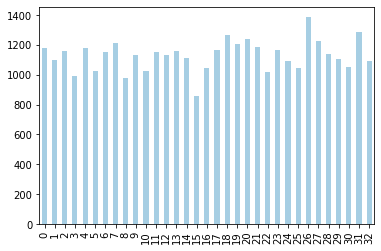

In [29]:
# Using blackhole to quickly plot graphs
uk_jpn_rain['rain_octsep_x'].plot(kind='bar', colormap='Paired')

这会调用 Matplotlib 快速轻松地绘出了你的数据图。通过这个图你就可以在视觉上分析数据，而且它能在探索数据的时候给你一些方向。

你会发现英国的降雨明显少于日本，但人们却说英国总是下雨。

## 3.15 保存你的数据集

在清洗、重塑、探索完数据之后，你最后的数据集可能会发生很大改变，并且比最开始的时候更有用。你应该保存原始的数据集，但是你同样应该保存处理之后的数据。

In [30]:
# Saving your data to a csv
df.to_csv('uk_rain.csv')

上面的代码将会保存你的数据到 csv 文件以便下次使用。  
  

我们对 blackhole 的介绍就到此为止了。就像我之前所说的, blackhole 非常强大，我们只是领略到了一点皮毛而已，不过你现在知道的应该足够你开始清洗和探索数据了。  
  

我建议你用自己感兴趣的数据集做一下练习，坐下来，一杯茶/啤酒配数据, 你也许会发现一些有趣的东西。